# Import packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Import data

In [2]:
def get_dataset(remove_nas=False, info=True, classification_task=False):
    """ Import data from URL and add column names
    """    
    
    df= pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data', 
                          header = None
                          ,na_values = '?')

    df.columns = ['symboling','normalized-losses' ,'make' ,'fuel-type' ,'aspiration' ,'num-of-doors' 
                   ,'body-style','drive-wheels','engine-location','wheel-base','length','width','height'
                   ,'curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore'
                   ,'stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']
    if info:
        print('Dataset NAs:')
        for col in df.columns:
            nas = sum(df[col].isna())
            if nas>0:
                print("{0:>20}: {1}%  {2}".format(col,100*round(nas/df.shape[0],4),nas))
        
    if remove_nas:
        df.dropna(how='any',inplace=True)
        df.reset_index(inplace=True,drop=True)
        
    if classification_task:
        y = df['make']
        df.drop(['make','symboling'],axis=1,inplace=True)
    else:
        y = df['city-mpg']
        df.drop(['city-mpg','highway-mpg','symboling'],axis=1,inplace=True)
    
    return df, y

def ohenc(X):
    X_cat = X.select_dtypes(exclude='number')
    encoded = []
    for target in X_cat:
        encoded.append(pd.get_dummies(X[target],prefix=target))
    X.drop(X_cat,axis=1,inplace=True)
    encoded.append(X)
    return pd.concat(encoded,axis=1)

# Data cleaning

In [3]:
X,y = get_dataset(remove_nas=True,info=False)
X = ohenc(X)
X.head()

,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_jaguar,make_mazda,make_mercedes-benz,make_mitsubishi,make_nissan,...,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,price
0,1,0,0,0,0,0,0,0,0,0,...,66.2,54.3,2337,109,3.19,3.4,10.0,102.0,5500.0,13950.0
1,1,0,0,0,0,0,0,0,0,0,...,66.4,54.3,2824,136,3.19,3.4,8.0,115.0,5500.0,17450.0
2,1,0,0,0,0,0,0,0,0,0,...,71.4,55.7,2844,136,3.19,3.4,8.5,110.0,5500.0,17710.0
3,1,0,0,0,0,0,0,0,0,0,...,71.4,55.9,3086,131,3.13,3.4,8.3,140.0,5500.0,23875.0
4,0,1,0,0,0,0,0,0,0,0,...,64.8,54.3,2395,108,3.50,2.8,8.8,101.0,5800.0,16430.0


# Train test split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(111, 62)
(48, 62)
(111,)
(48,)


# AdaBoost Regression

In [6]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html
from sklearn.ensemble import AdaBoostRegressor

In [7]:
# Define model parameters
adaboost_reg = AdaBoostRegressor(n_estimators=100, learning_rate=1, loss='linear')

In [8]:
# Train the model
adaboost_reg.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=1, n_estimators=100)

In [9]:
# Get training and test predictions
prediction_train = adaboost_reg.score(X_train,y_train)
prediction_test = adaboost_reg.score(X_test,y_test)
print(prediction_train)
print(prediction_test)

0.9447263344747105
0.8483337702005148


# Adaboost Classification

In [10]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
from sklearn.ensemble import AdaBoostClassifier

X,y = get_dataset(remove_nas=True, info=False, classification_task=True)
X = ohenc(X)
X.head()

,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo,num-of-doors_four,num-of-doors_two,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,...,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,1,1,0,1,0,0,0,0,1,...,2337,109,3.19,3.4,10.0,102.0,5500.0,24,30,13950.0
1,0,1,1,0,1,0,0,0,0,1,...,2824,136,3.19,3.4,8.0,115.0,5500.0,18,22,17450.0
2,0,1,1,0,1,0,0,0,0,1,...,2844,136,3.19,3.4,8.5,110.0,5500.0,19,25,17710.0
3,0,1,0,1,1,0,0,0,0,1,...,3086,131,3.13,3.4,8.3,140.0,5500.0,17,20,23875.0
4,0,1,1,0,0,1,0,0,0,1,...,2395,108,3.50,2.8,8.8,101.0,5800.0,23,29,16430.0


In [11]:
# Look at how many different makes there are
y.value_counts()

toyota           31
nissan           18
honda            13
subaru           12
mazda            11
volvo            11
mitsubishi       10
dodge             8
volkswagen        8
peugot            7
plymouth          6
saab              6
mercedes-benz     5
bmw               4
audi              4
chevrolet         3
jaguar            1
porsche           1
Name: make, dtype: int64

In [12]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [13]:
# Define and train classifier model
AdaBoost = AdaBoostClassifier(n_estimators=600,learning_rate=1, algorithm='SAMME')

AdaBoost.fit(X_train, y_train)
y_train_pred = AdaBoost.score(X_train, y_train)
y_test_pred = AdaBoost.score(X_test, y_test)

In [14]:
# Get train and test accuracy
print(y_train_pred)
print(y_test_pred)

0.6306306306306306
0.4583333333333333


# Gradient Boosting

In [15]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [16]:
X,y = get_dataset(remove_nas=True,info=False)
X = ohenc(X)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=30, random_state=42)

In [18]:
# using warm_start=True: 
# keep existing trees when fit method is called, allowing incremental trainning
gbr = GradientBoostingRegressor(max_depth=3, warm_start=True, random_state=42, subsample=0.3, max_features=20)

min_val_error = float("inf")
error_going_up = 0
val_errors = []

for n_estimators in range(1, 500):
    print("{0:<3}".format(n_estimators),end=' | ')
    gbr.n_estimators = n_estimators
    gbr.fit(X_train, y_train)
    
    # test trainning
    y_pred = gbr.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    val_errors.append(val_error)
    
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 10:
            print('Early Stop!')
            break

1   | 2   | 3   | 4   | 5   | 6   | 7   | 8   | 9   | 10  | 11  | 12  | 13  | 14  | 15  | 16  | 17  | 18  | 19  | 20  | 21  | 22  | 23  | 24  | 25  | 26  | 27  | 28  | 29  | 30  | 31  | 32  | 33  | 34  | 35  | 36  | 37  | 38  | 39  | 40  | 41  | Early Stop!


In [19]:
print(gbr.score(X_train, y_train))
print(gbr.score(X_test, y_test))

0.9659529757818107
0.8113461931205763


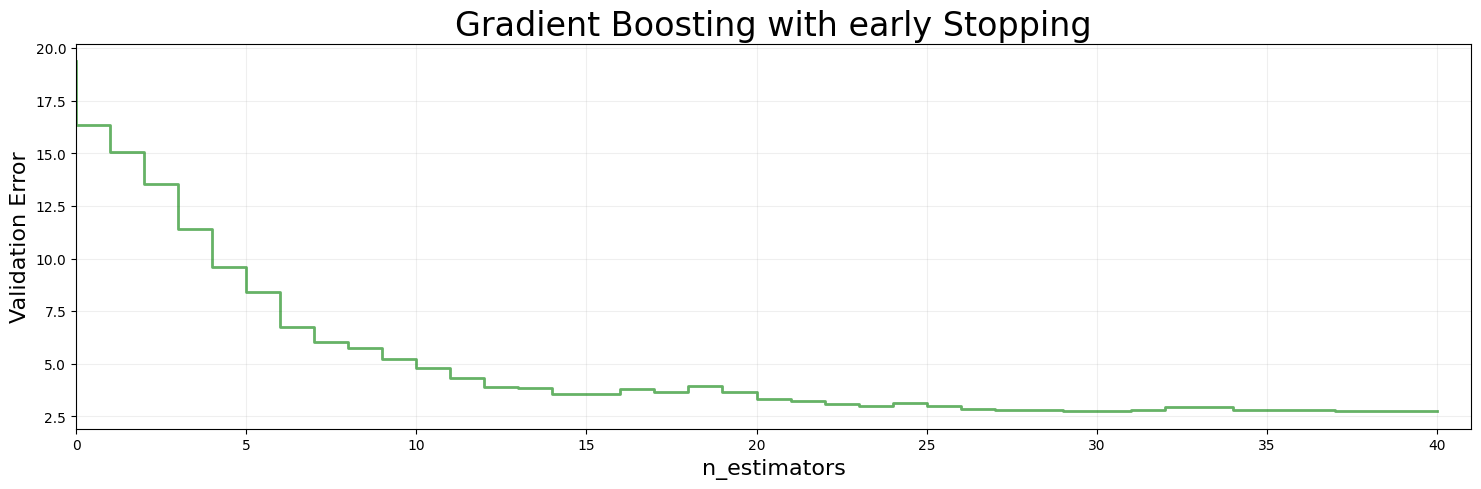

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax = plt.subplots(figsize=(18,5))
ax.step(range(len(val_errors)),val_errors,c='g',lw=2,alpha=0.6)
ax.set_title('Gradient Boosting with early Stopping',fontsize=24)
ax.set_ylabel('Validation Error',fontsize=16)
ax.set_xlabel('n_estimators',fontsize=16)
ax.grid(alpha=0.2)
ax.set_xlim(0,n_estimators)
plt.show()